# AMAZON SALES DATASET

Amazon was founded by Jeff Bezos in 1994  that originally began as an online bookstore and quickly expanded to become one of the world's largest e-commerce marketplaces that sells virtually everything from books to electronics to groceries and clothing. In the modern day, Amazon's portfolio includes retail, cloud computing, digital streaming, and artificial intelligence. As Amazon become larger every single year, the challange to keep the company growth will be a massive challange. The purpose of this analysis is to tackle 3 key components in Amazon that is Shipping Efficiency, Customer Retention and Loyalty, and Predictive Analytics. The dataset was collected from kaggle website:
https://www.kaggle.com/datasets/anandshaw2001/amazon-sales-dataset/data



In [3]:
# Import the required library
import pandas as pd
import numpy as np
import seaborn as sns #Statistical data visualization
import matplotlib.pyplot as plt
import datetime as dt #Manipulating dates and times

In [4]:
# Install package for loading xlsx
# library designed to read from and write to Excel
!pip install pandas openpyxl

In [5]:
# Load data
df = pd.read_excel('Amazon_Raw.xlsx')

### Exploratory Data Analysis (EDA)
Performing EDA is a critical initial step in the data analysis process that involves examining and summarizing the main characteristics of a data set before applying more formal statistical or machine learning models. 
Exploratory Data Analysis (EDA) is a technique used in data analysis to uncover patterns, spot anomalies, and check assumptions through summary statistics and graphical representations

In [6]:
# Check for the first six row of the dataset
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [7]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [8]:
# missing values
df.isna().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [9]:
# duplicated values
# To check if there is any duplication in the dataset
df.duplicated().sum()

0

In [10]:
# Describe data
df.describe()

,Order Date,Ship Date,Sales,Quantity,Profit
count,3203,3203,3203.000000,3203.000000,3203.000000
mean,2013-05-10 03:06:07.530440192,2013-05-14 01:25:25.195129600,226.493233,3.828910,33.849032
min,2011-01-07 00:00:00,2011-01-09 00:00:00,0.990000,1.000000,-3399.980000
25%,2012-05-22 00:00:00,2012-05-26 00:00:00,19.440000,2.000000,3.852000
50%,2013-07-22 00:00:00,2013-07-25 00:00:00,60.840000,3.000000,11.166400
75%,2014-05-23 00:00:00,2014-05-27 00:00:00,215.809000,5.000000,33.000400
max,2014-12-31 00:00:00,2015-01-06 00:00:00,13999.960000,14.000000,6719.980800
std,NaN,NaN,524.876877,2.260947,174.109081


In [10]:
# Identifying start date of the data set
df['Order Date'].min()

Timestamp('2011-01-07 00:00:00')

In [11]:
df.duplicated().sum()

0

In [13]:
# make a copy of the current data frame
amazon = df.copy()

### Customer Segmentation : Retaining Customer and Loyalty

Customer segmentation is a marketing strategy that involves dividing a customer base into smaller groups of individuals that share similar characteristics. The goal of customer segmentation is to allow companies to tailor marketing strategies and product offerings to meet the specific needs for customers leading to more efficient use of marketing resources and higher customer satisfaction and loyalty. There are several benefits of customer segmentation such as improved customer retention, efficient resource management and product recommendations. 

For this analysis, RFM analysis technique are selected as it categorizes customers based on their transaction history. The RFM stands for Recency, Frequency, and Monetary value, each corresponding to key customer traits. This technique is usefull for identifying which customers are most likely to respond to new offers and which ones are most profitable or loyal.

In [14]:
# Convert Order Dates to Monthly Periods
# Comparing data on a month-by-month basis rather than on specific dates
amazon['order_month'] = amazon['Order Date'].dt.to_period('M')

# Determine the Cohort Month for Each Customer
# Assigns every transaction of a customer to the cohort of their first purchase month
amazon['cohort_month'] = amazon.groupby('EmailID')['order_month'].transform('min')

# Calculate the Cohort Index
# Represents how many months have passed since the first purchase within that customer's cohort
amazon['cohort_index'] =  abs(amazon['order_month'].dt.month - amazon['cohort_month'].dt.month) + 1

In [16]:
# Creating reference date
reference_date = amazon['Order Date'].max()  + dt.timedelta(days=1)

In [17]:
# Calculate RFM metrics
rfm_metrics = amazon.groupby(['EmailID']).agg({
    'Order Date': lambda x: (reference_date - x.max()).days,  # Recency: Days since last order
    'Order ID': 'count',                                      # Frequency: Total number of transactions
    'Sales': 'sum'                                            # Monetary: Total money spent
})

In [18]:
# Building RFM 
# Define quartiles 
recency_quartiles = pd.qcut(rfm_metrics['Order Date'], 4, labels=range(4,0,-1))
frequency_quartiles = pd.qcut(rfm_metrics['Order ID'], 4, labels=range(1,5))
monetary_quartiles = pd.qcut(rfm_metrics['Sales'], 4, labels=range(1,5))
rfm_metrics = rfm_metrics.assign(R=recency_quartiles,F=frequency_quartiles,M=monetary_quartiles)


In [19]:
# Creating RFM Segmentation
# Combining the Recency, Frequency, and Monetary scores into a unified segment
rfm_metrics['RFM_Segment'] = rfm_metrics['R'].astype(int).astype(str) + rfm_metrics['F'].astype(int).astype(str) + rfm_metrics['M'].astype(int).astype(str)

print(rfm_metrics[['R', 'F', 'M']].dtypes)


R    category
F    category
M    category
dtype: object


In [20]:
# Creating Score
rfm_metrics['RFM_Score'] = rfm_metrics[['R','F','M']].sum(axis=1)

In [21]:
# Count the number of customers in each segment
segment_distribution = rfm_metrics['RFM_Segment'].value_counts()
print(segment_distribution)


RFM_Segment
111    64
112    32
444    31
344    29
244    28
211    24
443    23
311    20
322    18
432    17
223    16
333    16
243    16
411    15
221    14
222    14
323    14
343    14
334    13
113    13
423    13
144    13
332    12
212    12
122    12
422    12
421    11
434    11
123    11
312    11
234    10
232     9
412     9
233     9
321     8
433     8
324     7
424     7
442     7
121     7
224     5
133     5
134     5
413     4
213     4
124     4
242     4
231     3
114     3
214     3
143     3
313     2
431     2
331     2
314     2
342     2
441     1
414     1
341     1
Name: count, dtype: int64


In [22]:
# Sorting to view the top 15
top_segments = segment_distribution.sort_values(ascending=False)
print(top_segments.head(15))


RFM_Segment
111    64
112    32
444    31
344    29
244    28
211    24
443    23
311    20
322    18
432    17
223    16
333    16
243    16
411    15
222    14
Name: count, dtype: int64


In [23]:
# Calculate average values for each RFM score within segments
segment_profiles = rfm_metrics.groupby('RFM_Segment').agg({
    'Order Date': 'mean',
    'Order ID': 'mean',
    'Sales': 'mean',
    'RFM_Score': 'mean' 
}).sort_values(by='RFM_Score', ascending=False)

print(segment_profiles)


              Order Date   Order ID        Sales  RFM_Score
RFM_Segment                                                
444            39.322581   9.741935  3095.615016       12.0
443            39.869565   9.260870   988.145913       11.0
434            44.727273   5.454545  2503.792455       11.0
344           137.724138  10.448276  2956.510914       11.0
442            22.000000   7.857143   513.525714       10.0
433            43.625000   5.500000  1167.740750       10.0
334           174.230769   5.538462  2709.221308       10.0
244           392.714286   9.392857  2929.039125       10.0
424            46.571429   3.714286  2518.873429       10.0
343           162.142857   9.785714  1026.774500       10.0
414            45.000000   1.000000  1919.976000        9.0
333           146.187500   5.812500  1085.463000        9.0
342           190.000000   7.000000   466.545000        9.0
243           358.500000   8.750000   977.744250        9.0
234           348.700000   5.600000  381

In [24]:
# Define the aggregation dictionary
aggregations = {
    'Order Date': 'mean',
    'Order ID': 'mean',
    'Sales': ['mean', 'count']
}

# Perform the groupby and aggregation
result = rfm_metrics.groupby('RFM_Score').agg(aggregations).round(1)

print(result)

          Order Date Order ID   Sales      
                mean     mean    mean count
RFM_Score                                  
3              957.1      1.3    69.0    64
4              712.5      1.7   217.8    63
5              542.5      2.2   362.8    71
6              371.0      2.7   473.5    69
7              278.5      3.5   642.7    79
8              271.6      4.6   942.1    73
9              265.2      6.1  1408.3    96
10             212.5      7.8  2106.2    77
11              85.8      9.1  2158.9    63
12              39.3      9.7  3095.6    31


In [25]:
# Create conditions for all segments
conditions = [
    rfm_metrics['RFM_Score'] > 9,
    (rfm_metrics['RFM_Score'] > 5) & (rfm_metrics['RFM_Score'] <= 9),
    rfm_metrics['RFM_Score'] <= 5
]

# Labels for each condition
labels = ['Gold', 'Silver', 'Bronze']

# Create new column called General Segment
rfm_metrics['General_Segment'] = np.select(conditions, labels, default='Bronze')

In [26]:
# Counts each segment and aligned the color code with segments
segment_counts = rfm_metrics['General_Segment'].value_counts().sort_index()

Text(0, 0.5, 'Number of Customers')

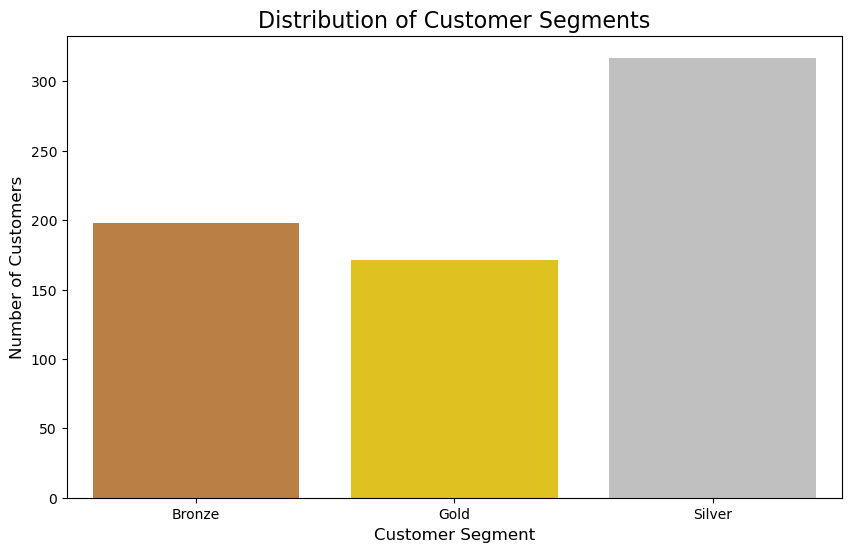

In [27]:
# create a bar plot
colors = ['#CD7F32','#FFD700','#C0C0C0']
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette=colors)

plt.title('Distribution of Customer Segments', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

### Based on this RFM analysis:
1. The silver segment are the largest compare to the others followed by bronze and gold. This shows that a lot of the customers showing moderate engaged segment, with moderate purchases, moderate time of inactivity, and moderate monetary value. This can be a good sign as customer quite frequently spending in the website but not frequent enough. Amazon will need to plan an event such as targeted marketing strategies, loyalty programs that can push this segment to gold segments. 
2. The bronze section could provide insights into what improvements could be made to the product line or customer service experience to increase their RFM scores.
3. Gold segments indicates customers who shop more recently, more frequently, and have spent more money. This is the customers that Amazon should look to retain for their lifetime as it yield the highest profit for the company. 

### Optimizing Logistics: Enhancing Shipping Efficiency Across Geographical Landscapes
Shipping efficientcy are one of the most pivotal factor for the success of businesses that rely on the timely and cost-effective distribution of goods such as Amazon. Most customers will rate their satisfaction of a product based on how long it will take for the product to reach them. A product that take a long time to be delivered will impact a customer satisfaction. Shipping efficiency are instrumental to tackle this problem. 

In [28]:
# Split the 'Geography' column and expand into separate columns
geo_split = amazon['Geography'].str.split(',', expand=True)

# Assign the second column (index 1) from the split operation as 'Area'
amazon['Area'] = geo_split[1]

# Display the updated DataFrame
print(amazon)

            Order ID Order Date  Ship Date                   EmailID  \
0     CA-2013-138688 2013-06-13 2013-06-17   DarrinVanHuff@gmail.com   
1     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
2     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
3     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
4     CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
...              ...        ...        ...                       ...   
3198  CA-2013-125794 2013-09-30 2013-10-04     MarisLaWare@gmail.com   
3199  CA-2014-121258 2014-02-27 2014-03-04      DaveBrooks@gmail.com   
3200  CA-2014-121258 2014-02-27 2014-03-04      DaveBrooks@gmail.com   
3201  CA-2014-121258 2014-02-27 2014-03-04      DaveBrooks@gmail.com   
3202  CA-2014-119914 2014-05-05 2014-05-10     ChrisCortes@gmail.com   

                                 Geography     Category  \
0     United States,Los Angeles,California       Labels   
1     United Stat

In [29]:
# Calculate the top 15 area by quantity
top_area = amazon.groupby('Area')['Quantity'].sum().nlargest(15)

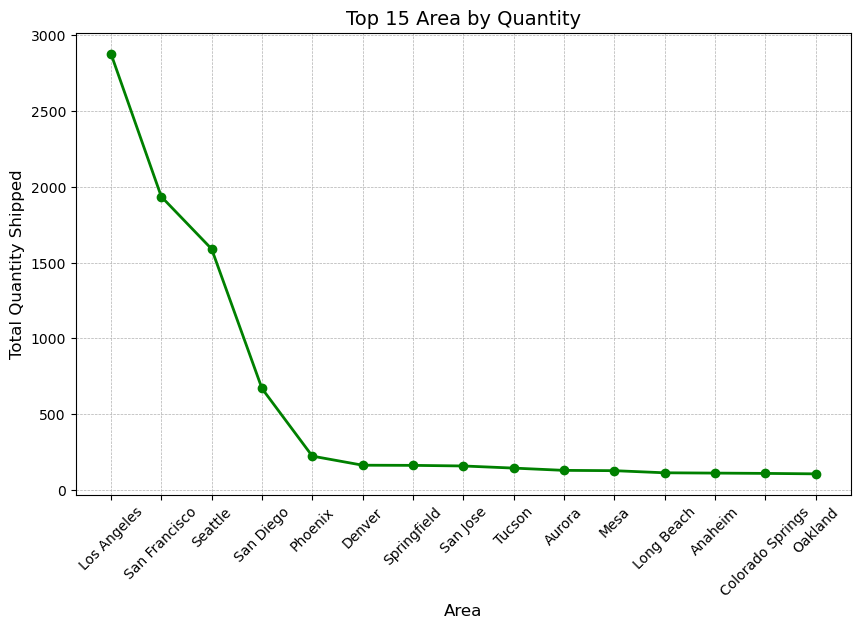

In [30]:
# Plotting top 15 area
plt.figure(figsize=(10, 6))
top_area.plot(kind='line', color='green', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(range(len(top_area)), top_area.index, rotation=45)

# Adding plot title and axis labels
plt.title('Top 15 Area by Quantity', fontsize=14)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Total Quantity Shipped', fontsize=12)

# Adding a grid for easier intrepetation
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

From the graph above, Los Angeles are the most shipped area followed by San Francisco and Seattle. These three area have significantly more shipping quantity compare to the rest of the area. Amazon should consider Los Angeles as central distribution hub as it has the highest shipping volume. This may yield a better efficiency improvements that could benefit the wider network. Amazon also should invest in better infrastructure in the area that has high quantity. 

### Predictive Analytics
Predictive analytics are really important in making big modern business decision. This proactive approach involves analyzing historical sales data, market trends, customer profiles, and a vast of other data types to model and predict future buying patterns. This predictive power enables more informed decision-making around production planning, and targeted marketing campaigns.

In [31]:
# Filter profit that more than 0
amazon_profit = amazon[amazon["Profit"] >= 0]

In [32]:
# Group by category and profit made
amazon_profit = amazon_profit.groupby("Category")["Profit"].sum()

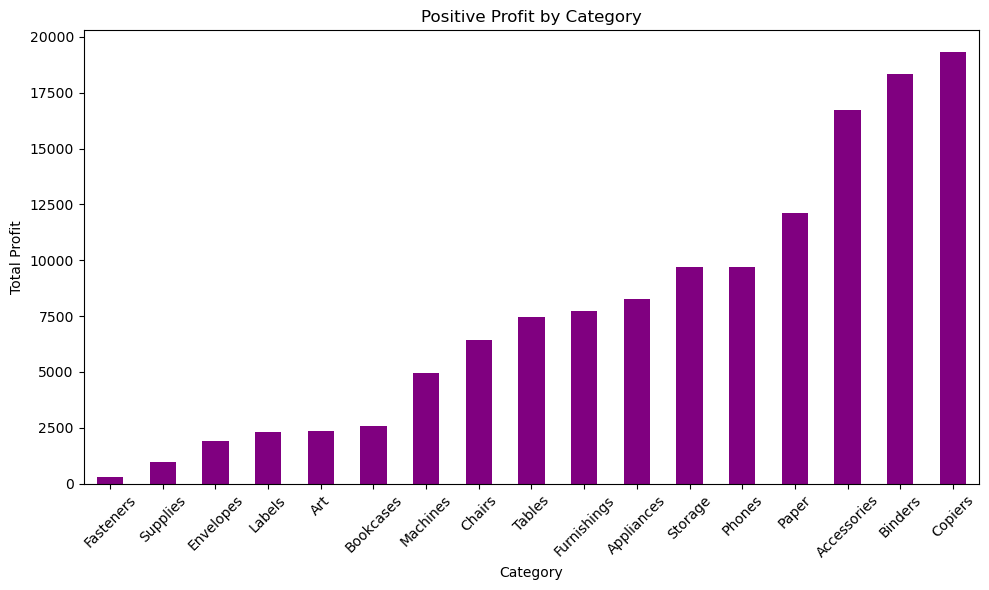

In [33]:
# Sort in descending order
amazon_top_profit = amazon_profit.sort_values(ascending=True)

# Plotting the results
plt.figure(figsize=(10, 6))
amazon_top_profit.plot(kind='bar', color='purple')
plt.title('Positive Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the bar chart above, the most profitable item is copiers followed by binders and accessories. The worst performing products are fasterners followed by supplies and envelopes. Amazon should put more emphasize on these high profit products. Copiers being the top profit product may be due to online discount or easier comparison can be made between new copiers and second hand copiers. Top 2 highest profit products also belong in the same category that is office supply. This maybe because of many offices prefer to buy online rather than travel to physical store. Daily use products such as chairs and tables positioned in the middle of the chart. Daily use products can have a higher volume in terms of sale but have a lower profit. This can happen because of a few factor such as heavily discounted items to attract more user on the platform or cheap product that generally return less profit than expensive products. 